<a href="https://colab.research.google.com/github/ohhanol/MachineLearning/blob/main/Data_Preprocessing_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L05
# - Data Preprocessing and Machine Learning with Scikit-Learn
# - KNN algorithm

> Ref: Sebastian Raschka (sraschka@wisc.edu), 수정자 : Haechul Choi(HNU)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Overview

본 강의는 다음을 소개
*   데이터 전처리에 매우 유용한 Python 라이브러리인 Pandas
*   기계학습을 위해 잘 설계된 Scikit-learn 기계 학습 라이브러리
*   *K*-Nearest Neighbors (KNN) 알고리즘

In [ ]:
# google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 작업할 폴더 위치 설정 (본인 폴더 경로에 맞게 수정필요)
colab_path = "/content/drive/MyDrive/MachineLearning/5주차"

## Pandas -- A Python Library for Working with Data Frames

- Pandas는 Python을 위한 가장 인기있고 편리한 데이터 처리 라이브러리 (공식 웹사이트: https://pandas.pydata.org)
- NumPy Arrays와의 차이?
    - 다른 자료형 허용 (열은 다른 data type을 가질 수 있다)
    - 데이터 처리에 유용한 몇 가지 더 편리한 기능이 추가됨

### Loading Tabular Datasets from Text Files Using Pandas

- `read_csv` 명령어를 이용하여 CSV 파일을 `DataFrame` 클래스인 Pandas data frame object f로  로드
- Data frame도 `head` 명령 지원; 처음 5개 열을 보여줌.

In [ ]:
import pandas as pd
import os

# 실습자료 data 폴더의 iris.csv 파일 read
df=pd.read_csv(os.path.join(colab_path, 'data/iris.csv'))
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# df의 type 확인
type(df)

pandas.core.frame.DataFrame

- 차원(dimensions) 체크
- `DataFrame` `shape` 속성은 NumPy array `shape`(강의 04)과 동일하게 동작

In [ ]:
# df 의 shape 확인
df.shape

(150, 6)

#### Digression: Lambda Functions

- "lambda 함수"는 기본적으로 "일반 함수"와 동일하지만 한 줄로 더 간결하게 작성될 수 있음.

In [ ]:
# some_func 예제 (일반 함수)
def some_func(x):
  return 'Hi? My name is Hanol. I am ' +str(x) + ' years old.'

some_func(22)

'Hi? My name is Hanol. I am 22 years old.'

In [ ]:
# some_func 예제 (lambda 함수)
# 위의 함수 정의를 한 줄로 간단하게 구현 가능!!!

f=lambda x: 'Hi? My name is Hanol. I am ' + str(x) + ' yeas old.'
f(22)

'Hi? My name is Hanol. I am 22 yeas old.'

### Basic Data Handling

- `apply` 메서드는 pandas `DataFrame` 항목을 **열** 축을 따라 조작하는 편리한 방법을 제공
- 다음 코드는, 클래스 레이블을 문자열 표현 (예: "Iris-Setosa")에서 정수 표현 (예: 0)으로 변환하는 것. 이런 정수형 변환은 관례이며 다양한 기계 학습 도구와의 호환성을 위한 권장사항임.

*   x가 'Iris-setosa'이면 0으로 바꿔주는 lambda 함수를 apply하기
*   Isis-setosa가 아니면 그대로 x

 즉, 문자 → 숫자로 바꾸는 과정!!

In [ ]:
# df의 'Species' 열의 문자열 표현을 정수표현으로 변경

df['Species']=df['Species'].apply(lambda x:0 if x=='Iris-setosa' else x)
df.head()   # 앞에 5개만 출력

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#### .map vs. .apply

- 여러 개의 열 값을 매핑하려면, `apply`를 사용하는 것보다 'map' 메서드를 사용하는 것이 종종 더 편리
- `apply` 메서드로 다음 코드를 달성하려면, `apply`를 세 번 호출해야 함.

In [ ]:
# .map 함수를 사용하여 Species 열의 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 값을 0, 1, 2로 한번에 mapping
d={'Iris-setosa':0,
   'Iris-versicolor':1,
   'Iris-virginica': 2}

df=pd.read_csv(os.path.join(colab_path, 'data/iris.csv'))
df['Species']=df['Species'].map(d)
df.head()


,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


-`tail` 메서드는 `head`와 유사하지만 기본적으로 마지막 다섯 행을 보여줌. 마지막 클래스 레이블 (Iris-Virginica)도 성공적으로 변환되었는지 확인하기 위해 이를 사용함.

- Iris-virginica까지 숫자 2로 바뀐 걸 확인할 수 있음!!

In [ ]:
# tail함수 사용 예제
df.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


- 실제로 `Species` 열의 모든 행 항목이 올바르게 변환되었는지 확인
- unique함수: 주어진 배열에서 모든 고유 값을 검색하고 이러한 고유 값을 정렬

In [ ]:
# numpy의 unique 함수를 사용하여 확인
import numpy as np

np.unique(df['Species'])

array([0, 1, 2])

#### NumPy Arrays

- Pandas의 데이터 프레임은 NumPy arrays을 기반으로 구축됨.
- 많은 기계 학습 관련 도구들도 이제 pandas `DataFrame` 객체를 입력으로 지원하지만, 관례적으로 대부분의 작업에 NumPy arrays를 사용
- `values` 속성을 통해 `DataFrame`의 기본 NumPy 배열에 접근 가능

In [ ]:
# value 속성을 사용하여 df의 'Species'열의 값들을 배열 형태로 y에 저장 및 출력
y=df['Species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- pandas `DataFrame`에서 열과 행을 접근하는 다양한 방법이 있다. 다음 문서를 참고, https://pandas.pydata.org/pandas-docs/stable/indexing.html
-`iloc` 속성은 정수 기반의 인덱싱과 슬라이싱을 지원하며, 이는 NumPy arrays에서 인덱싱을 사용하는 방식과 유사하다(강의 04). 다음 표현식은 `DataFrame`에서 열 1, 2, 3, 4(꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)을 선택한 다음 기본 NumPy arrays를 X에 할당한다.
- 빠른 체크를 위해, NumPy arrays에서 처음 다섯 행만을 출력

In [ ]:
# df의 1, 2, 3, 4열의 값을 담은 X를 생성후 5번째 행까지 출력
X=df.iloc[:,1:5].values       # 1:5는 1,2,3,4
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Exploratory Data Analysis

- MLxtend 라이브러리(http://rasbt.github.io/mlxtend/)는 "머신러닝 확장"을 의미하며, 머신러닝 및 데이터 과학 작업을 위한 몇몇 편리한 기능을 포함함.
- 특히, scatterplotmatrix 함수로 데이터셋의 산점도 행렬을 표시할 수 있으며,  이는 데이터셋의 개요를 살펴보기에 유용함. (특성 간의 관계를 조사하거나 이상치를 찾는 등).

참고) 아래 코드에서 만약 mlxtend를 import 하지 못하면 mlxtend를 설치해야 함.
> pip install mlxtend


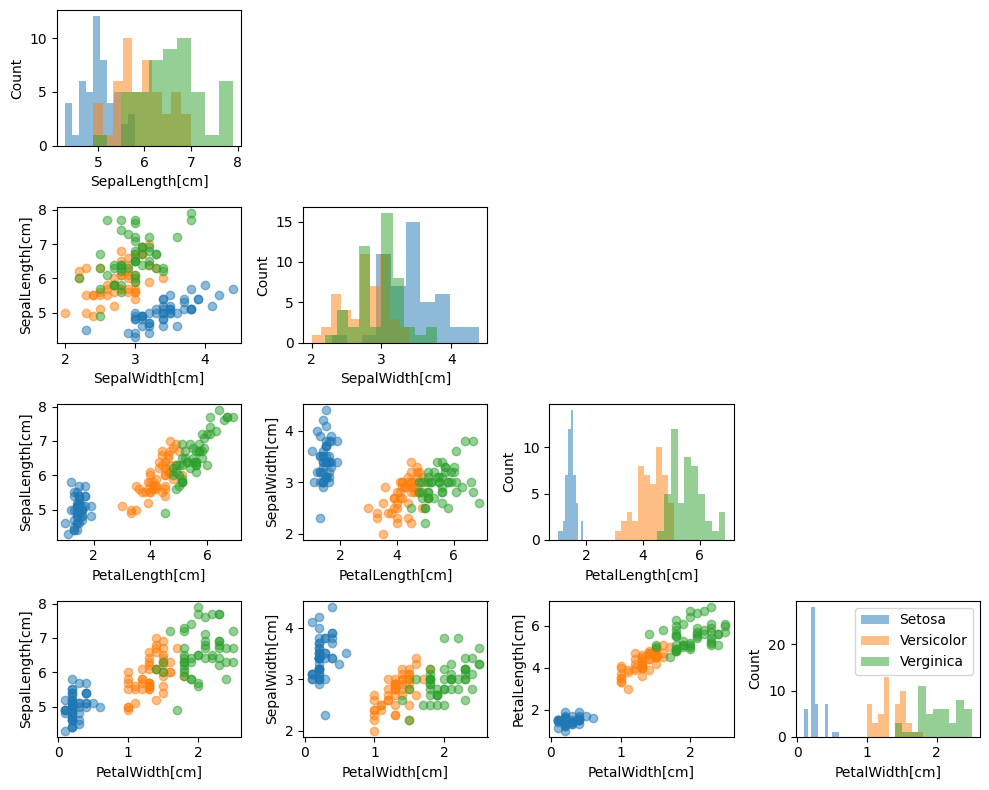

In [ ]:
%matplotlib inline
# 필요한 library import
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix

# df의 1, 2, 3, 4열의 값들로 다양한 형태의 figure 생성
names=df.columns[1:5]

fig,axes=scatterplotmatrix(X[y==0], figsize=(10,8), alpha=0.5)
fig,axes=scatterplotmatrix(X[y==1], fig_axes=(fig,axes), alpha=0.5)
fig,axes=scatterplotmatrix(X[y==2], fig_axes=(fig,axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Setosa', 'Versicolor', 'Verginica'])

# figure 저장 및 출력
plt.savefig(os.path.join(colab_path, 'eda.pdf'))
plt.show()

## Splitting a Dataset into Train, Validation, and Test Subsets

- 다음 코드 셀들은 데이터셋을 여러 하위 집합으로 분할하는 과정을 보여준다.
- 데이터셋을 분할하기 전에 중요한 과정은 데이터셋을 섞는 것이다. (만약 데이터셋이 분할되기 전에 정렬되었다면 대표성이 없는 클래스 분포를 얻을 수 있기 때문에 데이터 셋을 섞는 과정이 필요하다.)

In [ ]:
import numpy as np

# dataset 을 랜덤하게 섞어 permuted_indices에 입력
indices=np.arange(X.shape[0])        # X의 첫번째 열을 배열 형태로
rng=np.random.RandomState(123)
permuted_indices=rng.permutation(indices)   # 원소의 순서 섞기
permuted_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [ ]:
# train/validation/test dataset의 갯수 지정
# 0.8 = 0.65 + 0.15
train_size, valid_size =int(0.65 *X.shape[0]), int(0.15*X.shape[0])
test_size=X.shape[0]-(train_size+valid_size)

print(train_size, valid_size, test_size)

97 22 31


In [ ]:
# permute_indices의 인덱스 값들을 각각 train_ind, valid_ind, test_ind에 나눠 입력
train_ind=permuted_indices[0:train_size]
valid_ind=permuted_indices[train_size:(train_size+valid_size)]
test_ind=permuted_indices[(train_size+valid_size):]

In [ ]:
# 각 인덱스에 해당하는 실제 데이터 값들을 X로부터 X_triain, y_train/ X_valid, y_valid/ X_test, y_test로 입력
X_train, y_train=X[train_ind], y[train_ind]
X_valid, y_valid=X[valid_ind], y[valid_ind]
X_test, y_test=X[test_ind], y[test_ind]


# X_train의 shape 확인(지정한 train set의 수와 일치해야함)
X_train.shape

(97, 4)

## K-Nearest Neighbors Implementation

- 다음 코드 셀은 K-최근접 이웃 분류기의 매우 간단한 구현이다.
- 이는 매우 느리고 비효율적인 구현이며, 실제 문제에서는 알고리즘을 처음부터 구현하는 대신 라이브러리(예: scikit-learn)를 사용하는 것이 권장된다.
- 예를 들어, scikit-learn 라이브러리는 고급 데이터 구조(KD-Tree 및 Ball-Tree)를 사용하여 kNN을 훨씬 효과적이고 견고하게 구현하고 있다.  
- 알고리즘을 처음부터 구현하는 것이 유용한 상황은 학습 및 교육 목적이거나, 새로운 알고리즘을 시도하고 싶을 때이다. 따라서 아래의 구현은 scikit-learn에서 어떻게 구현되는지를 개략적으로 소개한다.

In [ ]:
# KNNClassifier model 구현
class KNNClassifier(object):
  def __init__(self, k, dist_fn=None):
    self.k=k
    if dist_fn is None:
      self.dist_fn=self._euclidean_dist

  def _euclidean_dist(self,a,b):
      dist=0.
      for ele_i, ele_j in zip(a,b):
        dist+=((ele_i-ele_j)**2)
      dist=dist**0.5
      return dist

  def _find_nearest(self,x):
      dist_idx_pairs=[]
      for j in range(self.dataset_.shape[0]):
          d=self.dist_fn(x,self.dataset_[j])
          dist_idx_pairs.append((d,j))

      sorted_dist_idx_pairs=sorted(dist_idx_pairs)

      return sorted_dist_idx_pairs

  def fit(self, X, y):
      self.dataset_=X.copy()
      self.labels_=y.copy()
      self.possible_labels_=np.unique(y)

  def predict(self, X):
    predictions = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        k_nearest=self._find_nearest(X[i])[:self.k]
        indices=[entry[1] for entry in k_nearest]
        k_labels=self.labels_[indices]
        counts = np.bincount(k_labels, minlength=self.possible_labels_.shape[0])
        pred_label=np.argmax(counts)
        predictions[i]=pred_label
    return predictions


knn_model=KNNClassifier(k=3)
knn_model.fit(X_train, y_train)

In [ ]:
# 생성한 knn_model의 예측 확인 (입력 X_valid)
print(knn_model.predict(X_valid))

[0 1 2 1 1 1 0 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0]


위의 구현에서 _ 접미사를 가진 클래스 속성이 있음을 주목
- 뒤에 오는 _ (예: `self.dataset_`)는 scikit-learn의 규칙이며 "fit" 속성임을 나타냅니다. 즉, fit 메서드를 호출한 후에만 사용할 수 있는 속성을 의미한다.

## The Scikit-Learn Estimator API

- 아래는 분류 및 회귀 모델/알고리즘을 구현하기 위해 사용되는 scikit-learn 추정기 API의 개략적 구조이다.
- 이전에 kNN 구현의 맥락에서 이러한 메서드를 보았지만, 아직 다루지 않은 흥미로운 추가 메서드인 `score`가 있다.
- `score` 메서드는 내부적으로 특징 (`X`)에 대해 `predict`를 실행한 다음 예측된 타겟과 실제 타겟 `y`를 비교하여 성능을 계산한다.
- 분류 모델의 경우, `score` 메서드는 분류 정확도 (범위 [0, 1])를 계산한다. - 즉, 올바르게 예측된 레이블의 비율. 회귀 모델의 경우, `score` 메서드는 결정 계수 ($R^2$)를 계산한다.

```python
class SupervisedEstimator(...):

    def __init__(self, hyperparam_1, ...):
        self.hyperparm_1
        ...

    def fit(self, X, y):
        ...
        self.fit_attribute_
        return self

    def predict(self, X):
        ...
        return y_pred

    def score(self, X, y):
        ...
        return score
    
    def _private_method(self):
        ...
    ...
    
```

- 아래 그래픽은 scikit-learn이 분류 및 회귀 알고리즘/모델을 구현하기 위해 사용하는 `SupervisedEstimator` API의 사용법을 요약한 것이다.
-  2D 데이터셋의 경우, 아래에 보여진 것처럼 mlxtend의 편리한 wrapper 함수를 사용하여 결정 영역을 그릴 수 있다.

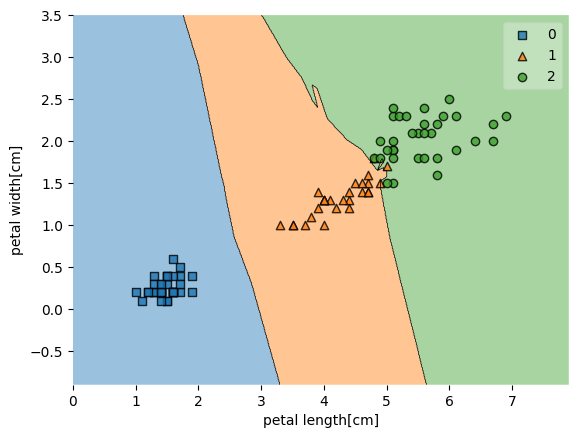

In [ ]:
# library import
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

# sklearn의 KNeighborsClassifier를 학습 및 결과를 표로 출력
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train[:,2:], y_train)
plot_decision_regions(X_train[:,2:], y_train, knn_model)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.savefig(os.path.join(colab_path, 'decisionreg.pdf'))
plt.show()

## Stratification

- 이전에는 데이터셋을 섞고 학습, 검증 및 테스트 부분으로 나누기 위한 코드를 직접 작성했었는데, 이것에는 상당한 단점이 하나 있다.
- 일반적으로 기계 학습 알고리즘/모델들이 학습, 검증 및 테스트 샘플이 동일한 분포에서 추출되었다고 가정한다. 하지만, 작은 데이터셋을 무작위로 나눈다면, 동일한 클래스 분포로 나뉘지 않을 수 있으므로 신뢰할 수 있는 모델 생성과 일반화 성능 추정이 어렵게 된다.

- 데이터를 분할한 후 각 하위 집합에서 클래스 레이블 비율이 동일하도록 보장하는 방법은 일반적으로 "계층화(stratification)"라고 불리는 접근법을 사용한다.
- 아래와 같이 `train_test_split` 메서드에서 클래스 레이블 배열을 `stratify` 매개변수에 전달하면 계층화가 지원된다.

- 각 분할에서 클래스 레이블의 분포를 유지하기 위한 데이터 분할 방법!!
- 앞에서 하나하나 나눈 거 'train_test_split'으로 한번에 가능

In [ ]:
from sklearn.model_selection import train_test_split

# class 비율을 유지하며 분할
# X_temp / X_test로 분할
X_temp, X_test, y_temp, y_test=\
  train_test_split(X,y,test_size=0.2, shuffle=True, random_state=123, stratify=y)
  # 앞에서 인덱스 섞어준 거 == shuffle

# 분할한 데이터셋의 분포를 확인
# y_temp에 클래스가 몇 개 있는지 bincount로 확인 가능
print('X size', X.shape, 'class proportions', np.bincount(y))
print('X_test size', X_test.shape, 'class proportions', np.bincount(y_test))
y.shape

X size (150, 4) class proportions [50 50 50]
X_test size (30, 4) class proportions [10 10 10]


(150,)

In [ ]:
# train set에서 train/validation set 분할
X_train, X_valid, y_train, y_valid=\
  train_test_split(X_temp, y_temp, test_size=0.2, shuffle=True, random_state=123, stratify=y_temp)

print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

Train size (96, 4) class proportions [32 32 32]
Valid size (24, 4) class proportions [8 8 8]
Test size (30, 4) class proportions [10 10 10]


## Data Scaling

- Iris 데이터셋의 경우, 모든 차원은 센티미터로 측정되었기 때문에 kNN의 맥락에서 "스케일링" 기능은 필요하지 않을 것이다 -- (제외하고자 하는 특성을 다르게 가중치를 부여하려는 경우는 제외)
- 특성(feature) 스케일링 여부는 다루고 있는 문제에 따라 다르다.
- 몇 가지 알고리즘들(특히 경사 하강법(L03에서 학습함) 등)은 데이터가 중앙에 위치하고 범위가 작을 경우 스케일링이 유용하다. 즉, 더 견고하고 수치적으로 안정적이며 빠르게 수렴한다.
- 특성 스케일링을 위한 여러 가지 방법이 있지만, 여기서는 가장 일반적인 "정규화" 방법 중 두 가지만 다룬다 : 최소-최대 스케일링(Min-Max scaling)과 Z-점수 표준화(standardization)

### Normalization -- Min-max scaling

- 최소-최대 스케일링은 특성을 [0, 1] 범위로 압축한다. 이는 단일 입력 $i$에 대한 다음과 같은 방정식을 통해 달성할 수 있다:

$$x^{[i]}_{\text{norm}} = \frac{x^{[i]} - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} }$$

- 다음은 NumPy를 사용하여 1D 입력 벡터(1개의 feature)에 대한 6개 데이터 인스턴스에 최소-최대 스케일링을 구현하고 적용하는 방법의 예제이다.

In [ ]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [ ]:
# Scaling 및 결과 출력
x_norm=(x-x.min())/(x.max()-x.min())
x_norm

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

### Standardization

- Z-점수 표준화는 특정 최적화(optimization) 방법(예: 경사 하강법)을 사용할 때 유용한 표준화 방법이다.
- 특성을 표준화한 후, 해당 특성은 표준 정규 분포의 특성을 갖게 되며, 즉 단위 분산과 평균이 0 ($N(\mu=0, \sigma^2=1)$)인 분포를 갖는다. 그러나 이는 특성을 정규 분포를 따르지 않는 상태에서 정규 분포를 따르는 상태로 변환시키지는 않는다.
- 특성을 표준화하기 위한 공식은 아래와 같으며, 단일 데이터 포인트 $x^{[i]}$에 대한 것이다.

$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [ ]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [ ]:
# Standardization 및 결과 출력
x_std=(x-x.mean())/x.std()
x_std

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

- 편리하게도, NumPy와 Pandas는 모두 `std` 메소드를 구현하고 있으며, 이 메소드는 표준 편차를 계산한다.
- 아래에 표시된 결과의 차이를 주목하시요.

In [ ]:
# numpy와 pandas의 Standarization 결과 차이 확인
df=pd.DataFrame([1,2,1,2,3,4])
print(type(df[0]))
df[0].std()

<class 'pandas.core.series.Series'>


1.1690451944500122

In [ ]:
print(type(df[0].values))
df[0].values.std()

<class 'numpy.ndarray'>


1.0671873729054748

- 위의 결과가 다른 이유는 Pandas가 "표본(sample)" 표준 편차 ($s_x$)를 계산하는 반면 NumPy가 "모집단(population)" 표준 편차 ($\sigma_x$)를 계산하기 때문이다.

$$s_x = \sqrt{ \frac{1}{n-1} \sum^{n}_{i=1} (x^{[i]} - \bar{x})^2 }$$

$$\sigma_x = \sqrt{ \frac{1}{n} \sum^{n}_{i=1} (x^{[i]} - \mu_x)^2 }$$

- 기계 학습은 일반적으로 대규모 데이터셋을 다루기 때문에 Bessel 보정(분모에서 자유도 하나를 빼는 것)에 대해 크게 신경 쓰지 않는다.
- 더욱이, 여기서의 목표는 특정한 분포를 모델링하거나 분포 매개변수를 정확하게 추정하는 것이 아니다. 그러나 원한다면 NumPy의 'ddof' 매개변수를 사용하여 추가적인 자유도를 제거할 수도 있다. 그러나 실제로는 대부분의 경우 이것이 필요하지 않다.

In [ ]:
# ddof 매개변수 사용
df[0].values.std(ddof=1)

1.1690451944500122

- 매우 중요한 개념은 추정된 정규화 매개변수를 사용하는 방법이다 (예: z-점수 정규화에서 평균과 표준 편차).
- 특히, 훈련 세트에서 추정한 매개변수를 검증 및 테스트 세트를 변환하는 데 재사용하는 것이 중요하다. 이 매개변수를 다시 추정하는 것은 일반적인 "초보자 실수"이다.

In [ ]:
# 동일한 mean 값과 Sigma 값으로 Train/Validation/Test set Standarization
mu,sigma=X_train.mean(axis=0), X_train.std(axis=0)

X_train_std=(X_train-mu)/sigma
X_valid_std=(X_valid-mu)/sigma
X_test_std=(X_test-mu)/sigma

### Scikit-Learn Transformer API

Scikit-Learn의 Transformer API는 **데이터의 전처리 및 변환**을 담당하는 중요한 기능을 제공하는 파트이다. 이 API를 사용하면 데이터를 처리하고 모델에 입력으로 사용하기 전에 데이터의 형태를 변환하거나 조작할 수 있다. 이러한 변환 작업은 데이터 품질 향상, 모델 성능 향상 및 기계 학습 파이프라인의 핵심 부분으로 중요하다.

Transformer API의 주요 특징은 다음과 같다:

- **Consistency (일관성)**: Scikit-Learn에서 제공되는 모든 변환기는 일관된 API를 가지고 있다. `fit`, `transform`, 그리고 `fit_transform` 메서드를 사용하여 데이터 변환을 수행할 수 있다.

- **Modularity (모듈성)**: 각 변환 작업은 독립적인 변환기 객체로 구현된다. 이 객체들은 조합하여 복잡한 데이터 전처리 파이프라인을 구축할 수 있다.

- **Composition (구성)**: 변환 작업은 파이프라인으로 구성될 수 있다. 파이프라인은 여러 변환기를 순차적으로 연결하여 데이터를 처리한다.

- **Integration with Other Libraries (다른 라이브러리와의 통합)**: Scikit-Learn의 변환기는 다른 머신 러닝 라이브러리와 통합하기 쉽다. 예를 들어, 변환된 데이터를 다른 라이브러리의 모델에 바로 사용할 수 있다.

- **Customization (사용자 정의)**: 필요한 경우 사용자 정의 변환기를 생성할 수 있다. 이를 통해 데이터를 특정 방식으로 변환하거나 사용자 지정 전처리 작업을 수행할 수 있다.

Transformer API는 데이터 전처리 과정에서 다양한 작업을 수행할 수 있다. 예를 들어, 데이터 스케일링, 특성 추출, 텍스트 데이터의 토큰화, 범주형 데이터의 인코딩 등이 있다. 이러한 변환 작업을 통해 데이터는 기계 학습 모델에 적합한 형태로 변환되어 모델의 성능을 향상시킬 수 있다.







- scikit-learn의 변환기(API)는 일반적으로 예측기(estimator) API와 매우 유사하며, 주된 차이점은 변환기가 일반적으로 "비지도 학습"이라는 것이며, 이는 클래스 레이블이나 타겟 값을 사용하지 않는다는 것을 의미한다.

- scikit-learn에서의 변환기의 전형적인 예시로는 `MinMaxScaler`와 `StandardScaler`가 있으며, 이들은 이전에 설명한대로 최솟값-최댓값 스케일링과 z-점수 정규화를 수행하는 데 사용할 수 있다.


In [ ]:
# library import
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# sklearn.preprocessing을 활용하여 Standarization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_valid_std=scaler.transform(X_valid)
X_test_std=scaler.transform(X_test)



## Categorical Data

- 기계 학습 알고리즘의 입력으로 데이터셋을 전처리할 때, 범주형 변수를 어떻게 다루는지 주의해야 한다.
- 범주형 변수는 크게 두 가지 범주로 나뉜다: 명목형(norminal, 데이터의 순서가 의미 없음)과 순서형(ordinal, 데이터의 순서가 있음).

In [ ]:
import os
# categoricaldata.csv read
df=pd.read_csv(os.path.join(colab_path, 'data/categoricaldata.csv'))
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


- 위의 예에서 `size`는 순서형 변수의 예이다. 즉, 만약 이 글자들이 티셔츠 사이즈를 나타낸다면 M < L < XXL과 같은 순서를 정하는 것이 합리적일 것이다.
- 따라서, 순서형 변수에 증가하는 값에 할당할 수 있다. 그러나 범주 간의 범위와 차이는 우리의 도메인 지식과 판단에 따라 달라진다.
- 기계 학습 알고리즘을 위해 순서형 변수를 수치적 계산을 위한 적절한 표현으로 변환하기 위해, **Pandas**의 `map` 메서드를 아래와 같이 사용할 수 있다.

In [ ]:
# map 함수를 사용하여 df의 size 값 mapping 'M' -> 2, 'L' -> 3, 'XXL' -> 5
mapping_dict={'M':2,
              'L':3,
              'XXL':5}
df['size']=df['size'].map(mapping_dict)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


- 기계 학습 알고리즘은 클래스 레이블의 경우 순서를 가정하지 않는다.
- 여기서는 `map` 메서드를 사용하는 대신 scikit-learn의 `LabelEncoder`를 사용하여 클래스 레이블을 정수로 변환할 수 있다.

In [ ]:
# library import
from sklearn.preprocessing import LabelEncoder

# labelEncoder를 사용하여 범주형 데이터를 정수형으로 인코딩
le=LabelEncoder()
df['classlabel']=le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,5,15.3,0


- 명목 변수를 적절하게 나타내는 것은 조금 더 까다로운 작업이다.
- 기계 학습 알고리즘은 일반적으로 변수가 정수 값을 가질 경우 순서를 가정하기 때문에, 이러한 가정을 하지 않도록 약간의 "특별한 방법"을 적용해야 한다.
- 이 "특별한 방법"은 "원-핫(one-hot)" 인코딩이라고도 불리며, 아래에서 색상 변수에 대한 예시를 보여주는 것처럼 명목 변수를 이진 형태로 변환한다. (다시 말해, 주황 < 빨강 < 파랑과 같은 순서가 보통은 의미가 없기 때문에 이렇게 하는 것이다.)

In [ ]:
# 범주형 데이터를 가지고 있는 열을 원-핫 인코딩(one-hot encoding) 형태로 변경
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,2,10.1,0,0,1,0
1,3,13.5,1,0,0,1
2,5,15.3,0,1,0,0


- 위의 코드를 실행하면 "색상"에 대한 3개의 새 변수가 생성된다. 각 변수는 이진값을 가진다.
- 그러나 지금은 약간의 중복이 있다 (예: `color_green` 및 `color_red`의 값을 알고 있다면 `color_blue`의 값을 자동으로 알 수 있다).
- 다중공선성(collinearity)은 문제를 일으킬 수 있지만 (예: 선형 회귀의 폐쇄 형태의 맥락에서 역행렬이 존재하지 않을 수 있음), 대부분의 알고리즘은 다중공선성을 다룰 수 있기 때문에 기계 학습에서는 일반적으로 그렇게 크게 신경 쓰지 않는다. (예: 경사 하강 최적화를 통해 학습되는 정규화 패널티와 같은 제약을 회귀 모델에 추가).
- 그러나 가능하다면 다중공선성을 제거하는 것은 항상 좋은 생각이며, 원-핫 인코딩된 변수 중 하나의 열을 삭제함으로써 편리하게 수행할 수 있다.

In [ ]:
# 다중공선성을 제거하기 위해 drop_first 매개변수 사용
pd.get_dummies(df, drop_first=True)

,size,price,classlabel,color_green,color_red
0,2,10.1,0,1,0
1,3,13.5,1,0,1
2,5,15.3,0,0,0


## Missing Data

- 누락된 데이터를 처리하는 여러 가지 방법이 있다.
- 가장 간단한 접근 방법은 전체 열 또는 행을 제거하는 것이다.
- 다른 간단한 방법은 특성의 평균, 중앙값, 최빈값 등을 사용하여 누락된 값을 보정하는 것이다.
- 규칙이나 최선의 방법은 없으며, 적절한 누락 데이터 보정 방법의 선택은 여러분의 판단과 도메인 지식에 따라 달라진다.
- 아래에는 누락된 데이터 처리에 대한 몇 가지 예시가 있다.

In [ ]:
df = pd.read_csv(os.path.join(colab_path, 'data/missingdata.csv'))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# df의 각 열에서 NaN 값에 해당 하는 값의 갯수
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [ ]:
# 1. 값이 없는 행을 빼줌(drop)
# dropna 함수 사용(axis=0)
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# 2. 값이 없는 열을 빼줌(drop)
# dropna 함수 사용(axis=1)
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
# 3. 열의 평균값을 넣어주는 방법
from sklearn.impute import SimpleImputer

# SimpleImputer 사용하여 NaN 값 처리
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
X=df.values
X=imputer.fit_transform(df.values)
X

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Feature Transformation, Extraction, and Selection

이미 매우 간단한 특징 변환 사례, 즉 정규화, 즉 최소-최대 스케일링 및 표준화를 다루었다. 다른 경우도 많이 있지만, 특징 전처리의 광범위한 내용은 기계 학습 수업의 범위를 벗어난다. 그러나 이후 이 과목에서 인기 있는 특성 선택(순차적 특성 선택) 및 특성 추출(예: 주성분 분석) 기술 중 일부를 살펴볼 것입니다.

## Scikit-Learn Pipelines

**- pipeline: 데이터 전처리와 학습 모델을 하나로 묶음**

- scikit-learn 파이프라인은 매우 편리하고 강력한 개념이다. 이것은 scikit-learn을 다른 기계 학습 라이브러리와 구분 짓는 요소 중 하나이다.
- 파이프라인은 본질적으로 우리에게 추정기를 적합화하는 동안 일련의 전처리 단계를 함께 정의하게 해준다.
- 파이프라인은 자동으로 훈련 세트에서 특성 스케일링 매개변수를 추정하고 이를 새 데이터에 적용하는 것과 같은 함정을 자동으로 처리할 것이다 (우리가 이전에 z-점수 표준화에서 논의한 것).

- 아래는 특성 스케일링 단계를 kNN 분류기와 결합하는 예시 파이프라인이다.

In [ ]:
from sklearn.pipeline import make_pipeline

# sklearn.pipeline의 make_pipeline함수로 전처리 및 KNN Classifier pipeline 생성 후, 구조 확인
pipe=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
# pipeline 학습
pipe.fit(X_train, y_train)

# pipeline 예측
pipe.predict(X_test)

# 원랜 각각 하던 거 → pipeline 쓰면 한번만 fit 해주면 됨

array([1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 1, 1, 1, 1])

- 위에서 볼 수 있듯이, 파이프라인 자체는 scikit-learn의 추정기 API를 따른다.

( 참고: scikit-learn의 [FunctionTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)는 임의의 호출 가능한 함수에서 변환기 클래스를 만들 수 있게 해준다.)

## Intro Model Selection -- Pipelines and Grid Search

- 기계 학습 실무에서는 종종 기계 학습 알고리즘의 하이퍼파라미터를 조정하여 좋은 설정을 찾아야 한다.
- 하이퍼파라미터를 조정하고 결과 모델을 비교하고 선택하는 과정은 "모델 선택(model selection)"이라고도 한니다 (알고리즘 선택과 대조적).
- 이 과정에 대한 자세한 내용은 이 과목의 뒷부분에서 "모델 선택" 및 "알고리즘 선택"과 같은 주제를 더 자세히 다룰 것이다.
- 현재는 모델 선택을 수행하는 가장 간단한 방법을 소개하고 있다: "홀드아웃 메서드"를 사용하는 방법
- 홀드아웃 메서드에서는 데이터 집합을 3개 하위 집합으로 나눈다: 훈련 데이터, 검증 데이터 및 테스트 데이터.
- 일반화 성능의 추정치를 편향시키지 않기 위해 테스트 데이터를 한 번만 사용하려고 하며, 이것이 모델 선택 (하이퍼파라미터 조정)을 위해 검증 데이터를 사용하는 이유이다.
- 여기서 검증 데이터는 일반화 성능의 추정치 역할도 하지만, 모델 선택 과정에서 반복적으로 사용되기 때문에 테스트 데이터에 대한 최종 추정치보다 더 편향될 수 있다 (다중 가설 검정과 비슷한 원리이다).

In [ ]:
# library import
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# GridSearch 예제

# dataset load
iris=load_iris()
X, y=iris.data, iris.target

# train / test set 분할
X_train_valid, X_test, y_train_valid, y_test=train_test_split(X, y,
                                                              test_size=0.2, shuffle=True,
                                                              random_state=123, stratify=y)

# train / validation set 분할 인덱스
train_ind, valid_ind = train_test_split(np.arange(X_train_valid.shape[0]),
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y_train_valid)

# pipine 생성
pipe=make_pipeline(StandardScaler(),
                   KNeighborsClassifier())

# GridSearch를 수행할 parameter 선언
params={'kneighborsclassifier__n_neighbors': [1, 3, 5],
        'kneighborsclassifier__p': [1, 2]}

# GridSearch Setting
split=PredefinedHoldoutSplit(valid_indices=valid_ind)

grid=GridSearchCV(pipe,
                  param_grid=params,
                  cv=split)

# GridSearch  수행
grid.fit(X_train_valid, y_train_valid)

GridSearchCV(cv=<mlxtend.evaluate.holdout.PredefinedHoldoutSplit object at 0x7fa0008b1390>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5],
                         'kneighborsclassifier__p': [1, 2]})

In [ ]:
# GridSearch 결과 출력
grid.cv_results_

{'mean_fit_time': array([0.00226569, 0.00195599, 0.00189281, 0.00197148, 0.00203204,
        0.00190139]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.00508189, 0.00471473, 0.00560856, 0.00472045, 0.0049665 ,
        0.00510001]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kneighborsclassifier__p': masked_array(data=[1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kneighborsclassifier__n_neighbors': 1,
   'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifie

`kneighborsclassifier__p` : KNN에서 거리 측정 방법에 대한 하이퍼파라미터(hyperparameter)
- p = 1: 맨해튼 거리 (Manhattan distance) : 두 데이터 포인트 사이의 수평 및 수직 거리의 합으로 계산된다.
$$∣x_2−x_1∣+∣y_2−y_1∣$$
<br />
- p = 2: 유클리디안 거리 (Euclidean distance) : 두 데이터 포인트 사이의 직선 거리로 계산된다.
$$\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

`PredefinedHoldoutSplit` : mlxtend 라이브러리에서 제공되는 교차 검증 전략 중 하나로, 이미 정의된 검증 데이터셋을 활용하여 교차 검증을 수행할 수 있도록 도와주는 클래스
- 기본적인 교차 검증은 데이터를 여러 개의 폴드(fold)로 나누어 모델을 훈련하고 검증하는 과정을 반복한다. 이때 검증 데이터를 randomly 선택할 수 있다.
- 그러나 PredefinedHoldoutSplit은 검증 데이터셋이 이미 정해져 있는 경우에 유용하다.

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9583333333333334
{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1}


In [ ]:
# Grid Search 결과 출력
clf=grid.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f%%' % (clf.score(X_test, y_test)*100))

Test accuracy: 93.33%


## Further Resources

- Scikit-learn documentation: http://scikit-learn.org/stable/documentation.html

#실습 과제
- data 폴더의 titanic.csv를 read 하여 KNN Classification 예측을 수행해 결과를 출력
- titanic.csv dataset은 `Name`, `Sex`, `Ash`, `Age`, `SibSp`등의 11개의 값을 바탕으로 생존 확률(0, 1)을 예측해야 함.  
(Dataset read 후, pandas의 `loc`, `value`등을 활용하여 훈련데이터와 정답값을 분리하는 과정 및 전처리 과정 필요)  
(pandas의 `drop`함수 활용 권장)

- 위의 실습 내용을 참고하여 **60% 이상** 성능 달성

- 과제는 해당 셀 아래에 작성
- 권장사항: 데이터셋 분석
- [[titanic dataset 정보]](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

# 1. library import / Dataset read

In [ ]:
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import os

titanic_csv = pd.read_csv(os.path.join(colab_path, 'data/titanic.csv'))
print(titanic_csv.columns.values)   # 특징값 확인

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


* Survived: 생존(1) 사망(0) / Pclass: 객실 등급 / SibSp: 형제자매, 배우자 수 / Parch: 부모자식 수 / Carbin: 객실 번호 / Embarked: 승선한 항

# 2.Data preprocessing
2.1 예측에 영향을 주지 않는 데이터들을 제거



In [ ]:
data=titanic_csv.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print(data.columns.values)   # 바뀐 특징값 확인

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


2.2 NaN 값을 처리

In [ ]:
# data의 각 열에서 NaN의 개수 확인
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# 결측값이 많은 Age의 NaN에는 평균값으로,
# 결측값이 2개뿐인 Embarked의 NaN에는 최빈값으로 대체

# strategy가 'mean'인 SimpleImputer를 생성
imputer1 = SimpleImputer(strategy='mean')
# strategy가 'most_frequent'인 SimpleImputer를 생성
imputer2 = SimpleImputer(strategy='most_frequent')

# NaN값 처리
data['Age'] = imputer1.fit_transform(data[['Age']])
data['Embarked']=imputer2.fit_transform(data[['Embarked']])

# 바뀐 결측값 개수 확인
print(data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# 추가 실습 - 데이터 시각화

- 4주차 내용 中 matplot library를 사용해 어떤 특징을 가진 승객이 생존 확률이 높았는지 데이터 시각화

Text(0.5, 1.0, 'Survival rate by Embarked')

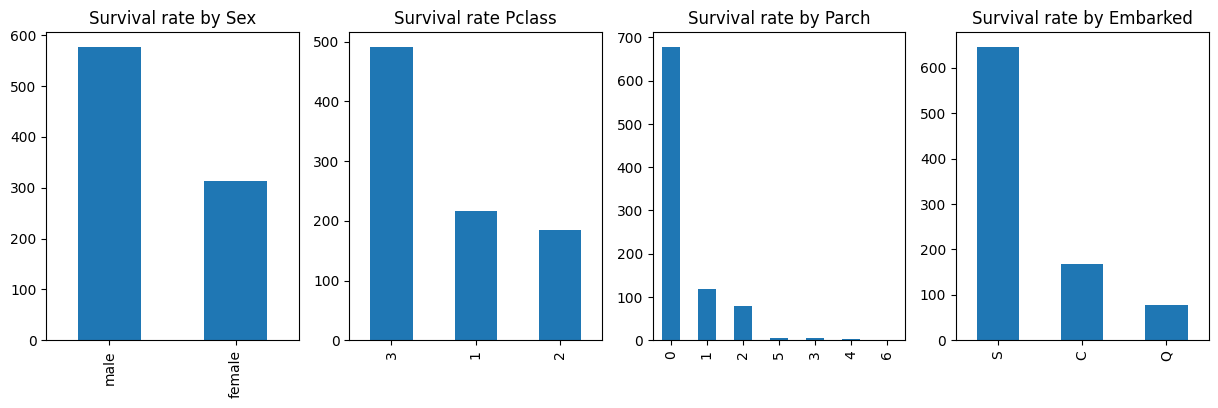

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

# 성별에 따른 생존률
plt.subplot(1,4,1)
data["Sex"].value_counts().plot(kind="bar")
plt.title('Survival rate by Sex')

# 객실 등급에 따른 생존률
plt.subplot(1,4,2)
data["Pclass"].value_counts().plot(kind="bar")
plt.title('Survival rate Pclass')

# 부모,자식 수에 따른 생존률
plt.subplot(1,4,3)
data["Parch"].value_counts().plot(kind="bar")
plt.title('Survival rate by Parch')

# 승선한 항에 따른 생존률
plt.subplot(1,4,4)
data["Embarked"].value_counts().plot(kind="bar")
plt.title('Survival rate by Embarked')

2.3 데이터 수치화

변수가 정수 값을 가질 경우 순서가 생기므로 이를 방지하기 위해 '원-핫' 인코딩 적용



In [ ]:
# string 값인 Sex/Embarked 데이터를 수치화
# male/female과 'S', 'C', 'Q'를 특징으로 바꾸기

sex_dumm=pd.get_dummies(data['Sex'])
sex_dumm.columns=['Female', 'Male']
data.drop(['Sex'], axis=1, inplace=True)
data=data.join(sex_dumm)

embarked_dumm=pd.get_dummies(data['Embarked'])
embarked_dumm.columns=['S', 'C', 'Q']
data.drop(['Embarked'], axis=1, inplace=True)
data=data.join(embarked_dumm)

data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,S,C,Q
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


2.4 train/validation/test set을 분할

In [ ]:
# 예측하고자 하는 값은 '생존여부'를 y로 빼주기
X=data.drop(columns=['Survived'])
y=data['Survived']

# train/test set 분할 (test_size, random_state 및 stratify 값 변경 금지)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y,
                                                                test_size=0.2, shuffle=True,
                                                                random_state=123, stratify=y)

# train/validation set 분할 (test_size 및 random_state 값 변경 금지)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y_train_valid)
# train/validation 분할 인덱스
train_idx, valid_idx=train_test_split(np.arange(X_train_valid.shape[0]),
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y_train_valid)

# 3. 훈련

In [ ]:
# pipeline 생성
pipe=make_pipeline(StandardScaler(),
                   KNeighborsClassifier())

# GridSearch를 수행할 parameter 선언
params={'kneighborsclassifier__n_neighbors': [1, 3, 5],
        'kneighborsclassifier__p': [1, 2]}

# GridSearch Setting
split=PredefinedHoldoutSplit(valid_indices=valid_idx)

grid_titanic=GridSearchCV(pipe,
                  param_grid=params,
                  cv=split)

# GridSearch 수행
grid_titanic.fit(X_train_valid, y_train_valid)

GridSearchCV(cv=<mlxtend.evaluate.holdout.PredefinedHoldoutSplit object at 0x7f9ff6f280a0>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5],
                         'kneighborsclassifier__p': [1, 2]})

# 4. 결과

In [ ]:
# GridSearch 결과 출력
grid_titanic.cv_results_

{'mean_fit_time': array([0.0139544 , 0.00782728, 0.00754118, 0.00704098, 0.00721025,
        0.00709891]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.01900148, 0.01627851, 0.0173347 , 0.01926494, 0.01794767,
        0.01730227]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kneighborsclassifier__p': masked_array(data=[1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kneighborsclassifier__n_neighbors': 1,
   'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifie

In [ ]:
print(grid_titanic.best_score_)
print(grid_titanic.best_params_)

0.7832167832167832
{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 2}


In [ ]:
# titanic.csv 파일에 대한 예측 결과 (60% 이상 달성)
clf = grid_titanic.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f%%' % (clf.score(X_test, y_test)*100))

Test accuracy: 78.21%
